In [4]:
import os
import torch
import numpy as np
import skimage.transform
import matplotlib.pyplot as plt
from easydict import EasyDict as edict

from main_monodepth_pytorch import Model
%reload_ext autoreload
%autoreload 2

Check if CUDA is available

In [5]:
torch.cuda.is_available()

True

In [6]:
torch.cuda.device_count()

1

In [7]:
torch.cuda.empty_cache()

In [6]:
dict_parameters = edict({'data_dir':'./data/train/',
                         'val_data_dir':'data/vals/',
                         'model_path':'./data/models/monodepth_MonodepthModel_001.pth',
                         'output_directory':'./data/output/',
                         'input_height':256,
                         'input_width':512,
                         'model':'MonodepthModel',
                         'pretrained':False,
                         'mode':'train',
                         'epochs':50,
                         'learning_rate':1e-2,
                         'batch_size': 8,
                         'adjust_lr':True,
                         'device':'cuda:0',
                         'do_augmentation':True,
                         'augment_parameters':[0.8, 1.2, 0.5, 2.0, 0.8, 1.2],
                         'print_images':False,
                         'print_weights':False,
                         'input_channels': 3,
                         'num_workers': 8,
                         'use_multiple_gpu': True})

In [7]:
model = Model(dict_parameters)
# model.load('data/models/monodepth_resnet18_001.pth')

Use a dataset with 1204 images
Use a dataset with 10934 images


In [8]:
model.train()

/root/monodepth_pytorch/.env/lib/python3.6/site-packages/torch/nn/functional.py:4004: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "


Val_loss: 3.017768097874334


KeyboardInterrupt: 

## Test the model

In [8]:
dict_parameters_test = edict({'data_dir':'data/test',
                              'model_path':'data/models/monodepth_MonodepthModel_001_last.pth',
                              'output_directory':'data/output/',
                              'input_height':256,
                              'input_width':512,
                              'model':'MonodepthModel',
                              'pretrained':False,
                              'mode':'test',
                              'device':'cuda:0',
                              'input_channels':3,
                              'num_workers':8,
                              'use_multiple_gpu':True})
model_test = Model(dict_parameters_test)

Use a dataset with 314 images


In [9]:
model_test.test()

Finished Testing


In [11]:
disp = np.load('data/output/disparities_pp.npy')  # Or disparities.npy for output without post-processing
disp.shape

(314, 256, 512)

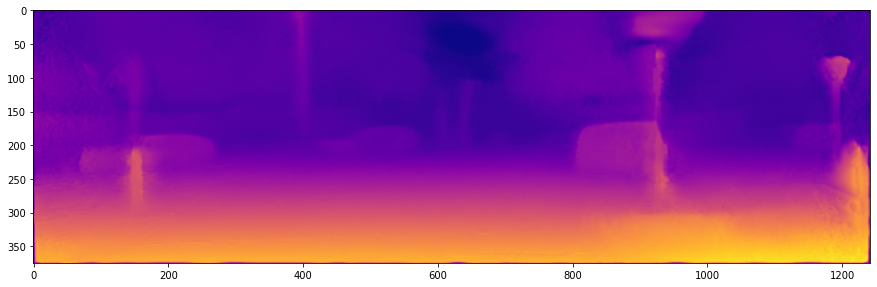

In [13]:
disp_to_img = skimage.transform.resize(disp[0].squeeze(), [375, 1242], mode='constant')
plt.imshow(disp_to_img, cmap='plasma')

Save a color image

In [14]:
plt.imsave(os.path.join(dict_parameters_test.output_directory,
                        dict_parameters_test.model_path.split('/')[-1][:-4]+'_test_output.png'), disp_to_img, cmap='plasma')

Save all test images

In [13]:
for i in range(disp.shape[0]):
    disp_to_img = skimage.transform.resize(disp[i].squeeze(), [375, 1242], mode='constant')
    plt.imsave(os.path.join(dict_parameters_test.output_directory,
               str(i).zfill(10)+'.png'), disp_to_img, cmap='plasma')

Save a grayscale image

In [16]:
plt.imsave(os.path.join(dict_parameters_test.output_directory,
                        dict_parameters_test.model_path.split('/')[-1][:-4]+'_gray.png'), disp_to_img, cmap='gray')

将结果制作成gif对比图

In [24]:
import imageio
import os
image_folder = './data/test/2011_09_26_drive_0014_sync/image_02/data'  # 图片文件夹路径
fps = 10  # 动画帧率（每秒钟播放的图片数量）
output_file = 'raw.gif'  # 输出GIF动画文件路径
# 获取所有图片文件名并按名称排序
images = [img for img in os.listdir(image_folder) if img.endswith('.png')]
images.sort(key=lambda x: int(x.split('.')[0]))   # 对文件名进行排序
# 将所有图片读取为numpy数组，组成一个列表
image_list = []
for filename in images:
    path = os.path.join(image_folder, filename)
    im = imageio.imread(path)
    image_list.append(im)
# 使用高质量的算法将图片列表转换为GIF动画并保存到指定路径
kwargs = {'fps': fps, 'quantizer': 'nq', 'subrectangles': True}
imageio.mimsave(output_file, image_list)

In [14]:
import imageio
import os
image_folder = './data/output'  # 图片文件夹路径
fps = 10  # 动画帧率（每秒钟播放的图片数量）
output_file = 'pred.gif'  # 输出GIF动画文件路径
# 获取所有图片文件名并按名称排序
images = [img for img in os.listdir(image_folder) if img.endswith('.png')]
images.sort(key=lambda x: int(x.split('.')[0]))   # 对文件名进行排序
# 将所有图片读取为numpy数组，组成一个列表
image_list = []
for filename in images:
    path = os.path.join(image_folder, filename)
    im = imageio.imread(path)
    image_list.append(im)
# 使用高质量的算法将图片列表转换为GIF动画并保存到指定路径
kwargs = {'fps': fps, 'quantizer': 'nq', 'subrectangles': True}
imageio.mimsave(output_file, image_list)